In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as P
from scipy import stats

import textwrap

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.metrics import r2_score
import walnut_utils as wnut
from importlib import reload

In [25]:
iniN = 3
endN = 52

src = '../hpcc/traditional/'
dst = '../hpcc/results/traditional/'

#filename = src + 'traditional_phenotype_summary.csv'
filename = src + 'qual_quant_summary.csv'
df = pd.read_csv(filename, dtype={1:str})

df = df.drop(index = df[df['PercentKernel'] == -1].index)
df['TipShrivel'] /= 100
df['MinorShrivel'] /= 100
df['MajorShrivel'] /= 100
df['PercentKernel'] /= 100

print(df.shape)

filename = src + 'col_labels.csv'
labels = pd.read_csv(filename, dtype=str, keep_default_na = False)
print(labels.shape)

cattraitnames = df.columns[endN:].values[[12,4,1,3,7,6,11,0,2]]

marker = ['o', 'v','*','^', 's', '<', 'X', '>', 'p', '8', 'h', 'H', 'D', 'd', 'P']
#col_wong = ['#e69f00', '#009e73', '#0072b2', '#d55e00', '#cc79a7', '#f0e442', '#56b4e9']
col_wong = ['#d81b60', '#1e88e5', '#ffc107', '#004d40', '#56e495']
col_wong += col_wong

(149, 67)
(67, 2)


In [5]:
df.head()

,UCACCSD,nut_count,plot_count,nut_length,nut_height,nut_width,nut_vol,nut_va3d,nut_ratio_feret,nut_area,...,ShellThickness,PackingTissue,KernelFill,TipShrivel,MinorShrivel,MajorShrivel,Plumpness,EaseOfRemoval,PercentKernel,Blank
0,03-001-3395,6,4,41.382216,34.552443,34.683614,23138.271108,5.061907,1.205837,6740.977257,...,1.075000,5.000000,4.750000,0.000000,0.000000,0.0,4.750000,4.500000,0.623294,0.000000
1,04-004-626,9,1,41.655988,36.264753,33.735949,24456.070925,4.624070,1.234757,6783.986184,...,1.100000,5.000000,6.000000,0.000000,0.000000,0.0,4.000000,5.000000,0.583988,0.000000
2,06-004-4,16,7,37.071349,34.994222,32.470430,20701.067413,4.320171,1.151675,5927.755393,...,1.114286,5.000000,5.000000,0.000000,0.031746,0.0,3.857143,4.857143,0.589313,5.714286
3,06-005-27,15,4,40.523602,33.250514,31.082693,19961.358383,4.605803,1.304487,5915.986251,...,1.475000,5.750000,5.250000,0.000000,0.000000,0.0,3.500000,5.750000,0.482632,2.500000
4,06-030-18,5,3,37.920928,32.983651,31.577548,18617.977820,4.443319,1.201473,5582.720320,...,1.233333,5.666667,5.666667,0.033333,0.000000,0.0,5.000000,5.666667,0.461030,0.000000


In [4]:
himalaya = '85-023-2'
interest = df[df.UCACCSD == himalaya]
other = df[df.UCACCSD != himalaya]

In [6]:
for i in range(len(df.columns)):
    print(i,df.columns[i], labels.col_labels[i], labels.col_units[i], sep='\t')

0	UCACCSD	UCACCSD	
1	nut_count	Batch Name	
2	plot_count	Scan Name	
3	nut_length	Nut Length	 [mm]
4	nut_height	Nut Height	 [mm]
5	nut_width	Nut Width	 [mm]
6	nut_vol	Nut Volume	 [mm$^3$]
7	nut_va3d	Nut VA3D	
8	nut_ratio_feret	Nut Feret Ratio	
9	nut_area	Nut Surface Area	 [mm$^2$]
10	nut_sphericity	Nut Sphericity	
11	nut_cnvx_area	Nut Convex Surface Area	 [mm$^2$]
12	nut_cnvx_vol	Nut Convex Volume	 [mm$^3$]
13	nut_ratio_cnvx_area	Nut Ratio Convex Area	 [%]
14	nut_inv_ratio_cnvx_vol	Nut Ratio Convex Volume	 [%]
15	krumbein	Krumbein Index	
16	sneed	Sneed Index	
17	air_vol	Air Volume	 [mm$^3$]
18	meat_vol	Kernel Volume	 [mm$^3$]
19	shell_vol	Shell Volume	 [mm$^3$]
20	vein_vol	Packing Volume	 [mm$^3$]
21	air_ratio_vol	Air Vol Ratio	 [%]
22	meat_ratio_vol	Kernel Vol Ratio	 [%]
23	shell_ratio_vol	Shell Vol Ratio	 [%]
24	vein_ratio_vol	Packing Vol Ratio	 [%]
25	shell_rugosity	Shell Rugosity	
26	shell_thickness	Shell Thickness	 [mm]
27	shell_prot_ratio	Protruding Shell Ratio	 [%]
28	shell_prot_v

In [10]:
df.iloc[:, offset:62]

,nut_length,nut_height,nut_width,nut_vol,nut_va3d,nut_ratio_feret,nut_area,nut_sphericity,nut_cnvx_area,nut_cnvx_vol,...,ShellIntegrity,ShellTexture,ShellColor,SEAL,ShellStrength,ShellThickness,PackingTissue,KernelFill,TipShrivel,MinorShrivel
0,41.382216,34.552443,34.683614,23138.271108,5.061907,1.205837,6740.977257,0.582681,4158.998689,24510.489428,...,7.0,5.500000,5.250000,4.250000,4.250000,1.075000,5.000000,4.750000,0.000000,0.000000
1,41.655988,36.264753,33.735949,24456.070925,4.624070,1.234757,6783.986184,0.600799,4296.255429,25710.028659,...,7.0,6.000000,5.000000,3.000000,4.000000,1.100000,5.000000,6.000000,0.000000,0.000000
2,37.071349,34.994222,32.470430,20701.067413,4.320171,1.151675,5927.755393,0.615104,3813.983010,21543.925797,...,7.0,4.571429,4.857143,5.000000,4.714286,1.114286,5.000000,5.000000,0.000000,0.031746
3,40.523602,33.250514,31.082693,19961.358383,4.605803,1.304487,5915.986251,0.601141,3748.761522,20747.580080,...,7.0,4.250000,4.000000,5.250000,6.000000,1.475000,5.750000,5.250000,0.000000,0.000000
4,37.920928,32.983651,31.577548,18617.977820,4.443319,1.201473,5582.720320,0.608684,3546.927181,19342.722958,...,7.0,5.000000,5.000000,5.000000,5.666667,1.233333,5.666667,5.666667,0.033333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,37.590689,31.840702,31.570336,17722.020315,5.014527,1.195004,5622.441745,0.584813,3508.891379,18955.761446,...,7.0,5.666667,5.333333,5.000000,5.000000,1.233333,5.333333,5.333333,0.333333,0.000000
145,33.426565,33.039911,30.970152,15968.164958,4.922195,1.096398,5197.450789,0.588949,3244.799751,16998.883349,...,7.0,6.000000,5.000000,5.000000,7.000000,2.000000,6.000000,4.000000,0.000000,0.100000
146,39.807957,35.294440,33.381418,21874.698312,4.689317,1.192358,6321.441331,0.597592,3959.471350,22862.905825,...,7.0,5.020408,4.959184,5.044444,5.306122,1.255102,5.040816,5.591837,0.124438,0.013426
147,42.074132,40.133462,35.577116,29806.225331,4.703076,1.187156,7784.492026,0.597162,4864.091684,31084.251214,...,7.0,5.000000,5.000000,4.250000,5.250000,1.275000,5.000000,4.750000,0.074074,0.033333


In [11]:
offset = 3

qtraits = np.arange(offset,endN)
ptraits = np.arange(endN, len(df.columns))

kcorrstat = np.ones((len(qtraits), len(ptraits)))
kpvalcorr = np.zeros_like(kcorrstat)

scorrstat = np.ones_like(kcorrstat)
spvalcorr = np.zeros_like(kcorrstat)

feats = df.iloc[:, offset:].values.copy()

for i in range(len(qtraits)):
    for j in range(len(ptraits)):
        kstat, kpval = stats.kendalltau(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        sstat, spval = stats.spearmanr(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        
        kcorrstat[i,j] = kstat
        kpvalcorr[i,j] = kpval
        
        scorrstat[i,j] = sstat
        spvalcorr[i,j] = spval

In [14]:
corr = scorrstat.copy()
print(corr.shape)

(49, 15)


In [15]:
np.argsort(np.abs(corr[:, 13]))[::-1]

array([48, 20, 23, 46, 41, 16, 25, 18, 24, 43, 44,  7, 22, 11,  4, 42,  5,
       28, 12, 13, 14, 10, 45, 36, 19, 33,  0, 35, 21, 47, 34, 38, 27, 17,
       30, 40, 29, 31, 39, 15,  6,  8, 32, 37,  9, 26,  3,  1,  2])

In [26]:
fs = 22
for yidx in ptraits:
    fig, ax = plt.subplots(2,4,figsize=(20,9), sharey=True)
    ax = np.atleast_1d(ax).ravel()

    y = df.iloc[:, yidx].values

    ax[0].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs);
    ax[4].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs);

    for i,xidx in enumerate(np.argsort(np.abs(corr[:, yidx-len(qtraits)-offset]))[::-1][:len(ax)] + offset):
        x = df.iloc[:, xidx].values

        xrange = np.linspace(np.min(x)-0.1, np.max(x)+0.1, 100)

        s = corr[xidx - offset, yidx - len(qtraits) - offset]
        ax[i].scatter(x,y, c='b', alpha=0.25, s=75)
        #ax[i].set_aspect('equal', 'datalim')
        ax[i].tick_params(labelsize=fs-2)

        ax[i].set_xlabel(labels.col_labels[xidx] + labels.col_units[xidx], fontsize=fs);

        new_series = P.Polynomial.fit(x,y, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(y, new_series(x))
        axlabel = 'R$^2$ = {:.2}\ns   = {:.2}'.format(r2,s)
        ax[i].plot(xrange, new_series(xrange), color='r', label=axlabel, ls='-.', lw=3)
        #ax.plot(xrange, xrange, color='k', label=axlabel, ls='-.', lw=3)

        ax[i].legend(loc='lower right', fontsize=fs)

    fig.tight_layout()
    filename = dst + 'highest_corrs_' + labels.col_labels[yidx].replace(' ', '_').lower() + '_2x4'
    print(filename)
    
    plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
    plt.close()

../hpcc/traditional/col_labels.csv
../hpcc/results/traditional/highest_corrs_shell_integrity_2x4
../hpcc/results/traditional/highest_corrs_shell_texture_2x4
../hpcc/results/traditional/highest_corrs_shell_color_2x4
../hpcc/results/traditional/highest_corrs_shell_seal_2x4
../hpcc/results/traditional/highest_corrs_shell_strength_2x4
../hpcc/results/traditional/highest_corrs_shell_thickness_2x4
../hpcc/results/traditional/highest_corrs_packing_tissue_2x4
../hpcc/results/traditional/highest_corrs_kernel_fill_2x4
../hpcc/results/traditional/highest_corrs_tip_shrivel_2x4
../hpcc/results/traditional/highest_corrs_minor_shrivel_2x4
../hpcc/results/traditional/highest_corrs_major_shrivel_2x4
../hpcc/results/traditional/highest_corrs_plumpness_2x4
../hpcc/results/traditional/highest_corrs_ease_of_removal_2x4
../hpcc/results/traditional/highest_corrs_kernel_weight_ratio_2x4


../hpcc/results/traditional/highest_corrs_shell_integrity_1x5
../hpcc/results/traditional/highest_corrs_shell_texture_1x5
../hpcc/results/traditional/highest_corrs_shell_color_1x5
../hpcc/results/traditional/highest_corrs_shell_seal_1x5
../hpcc/results/traditional/highest_corrs_shell_strength_1x5
../hpcc/results/traditional/highest_corrs_shell_thickness_1x5
../hpcc/results/traditional/highest_corrs_packing_tissue_1x5
../hpcc/results/traditional/highest_corrs_kernel_fill_1x5
../hpcc/results/traditional/highest_corrs_tip_shrivel_1x5
../hpcc/results/traditional/highest_corrs_minor_shrivel_1x5
../hpcc/results/traditional/highest_corrs_major_shrivel_1x5
../hpcc/results/traditional/highest_corrs_plumpness_1x5
../hpcc/results/traditional/highest_corrs_ease_of_removal_1x5
../hpcc/results/traditional/highest_corrs_kernel_weight_ratio_1x5
../hpcc/results/traditional/highest_corrs_blank_1x5


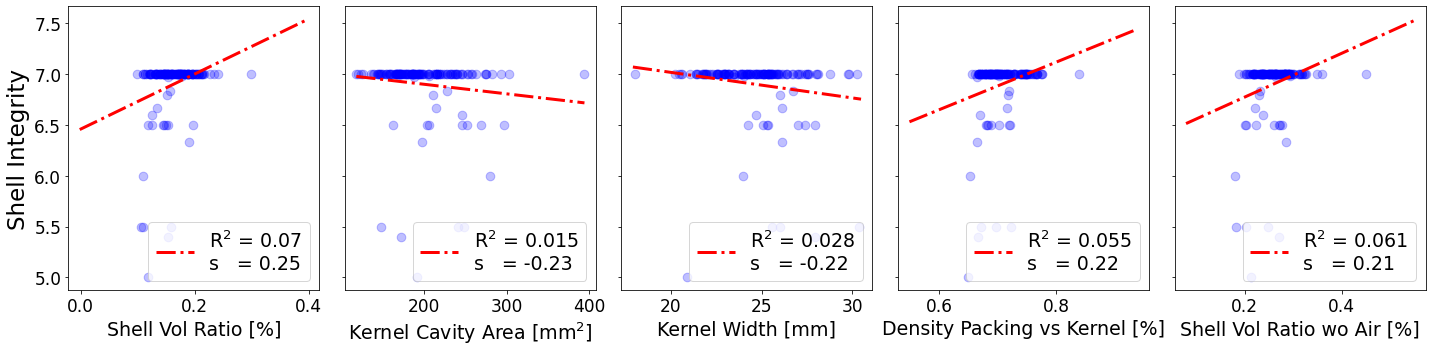

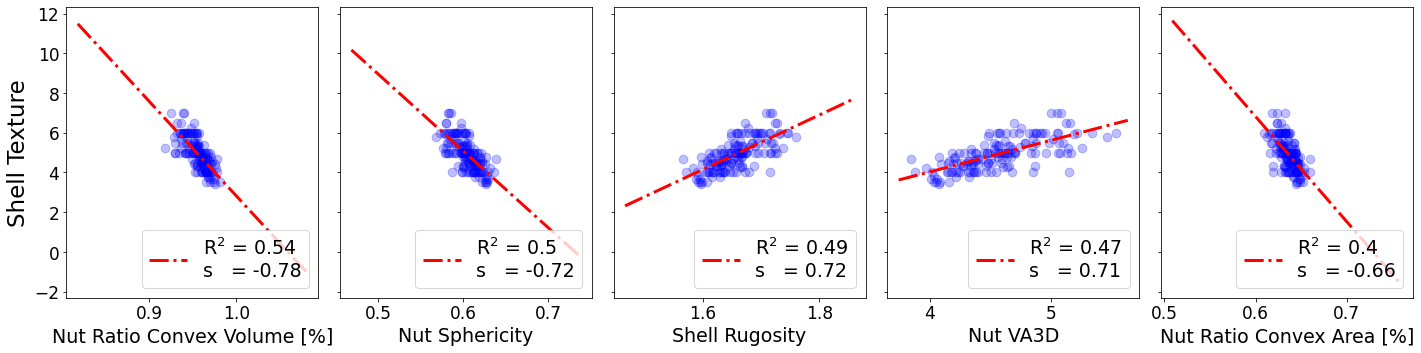

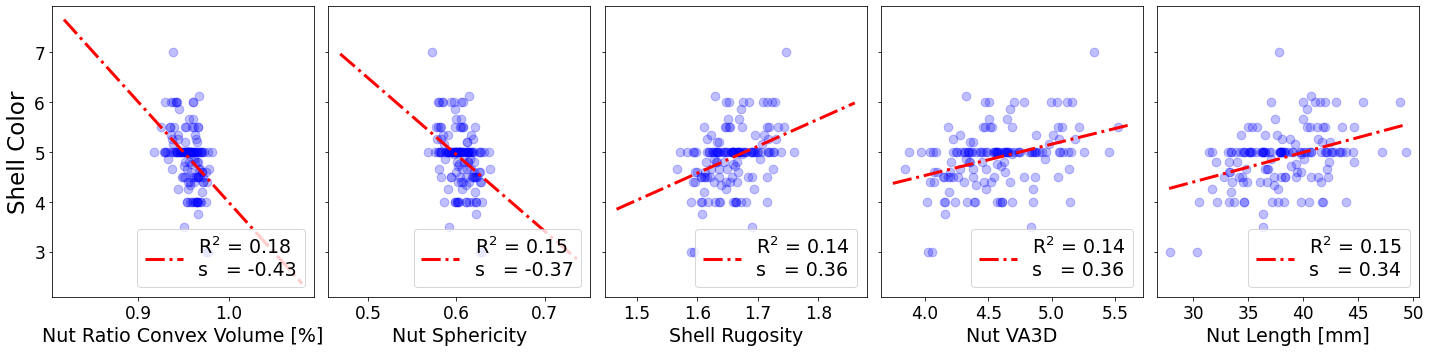

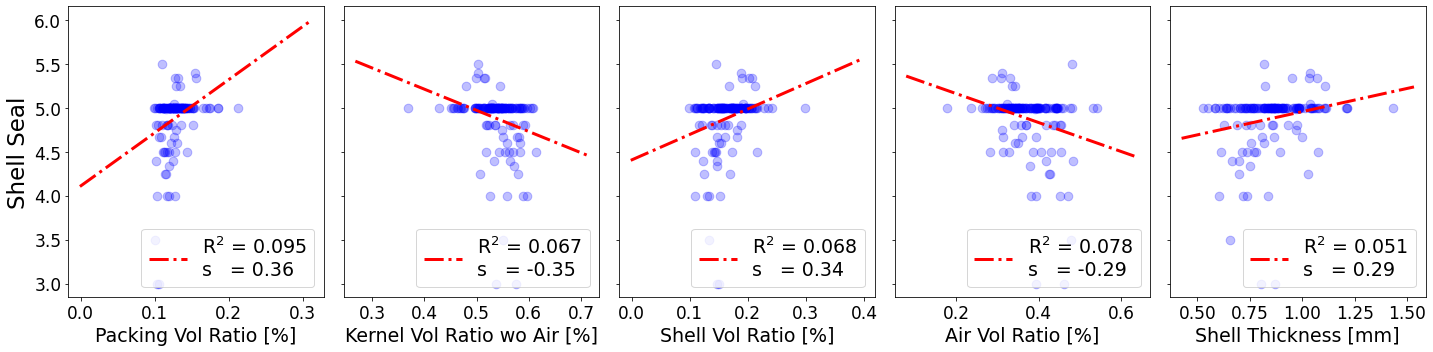

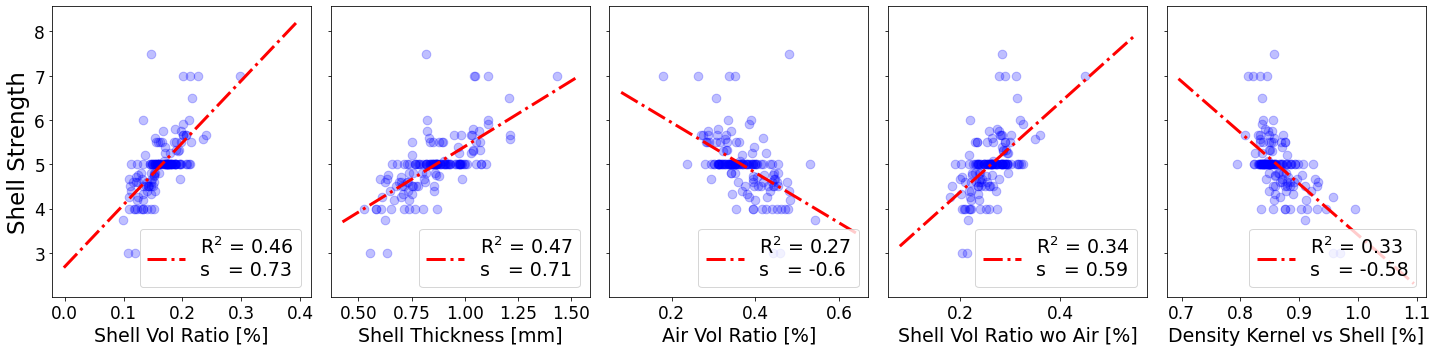

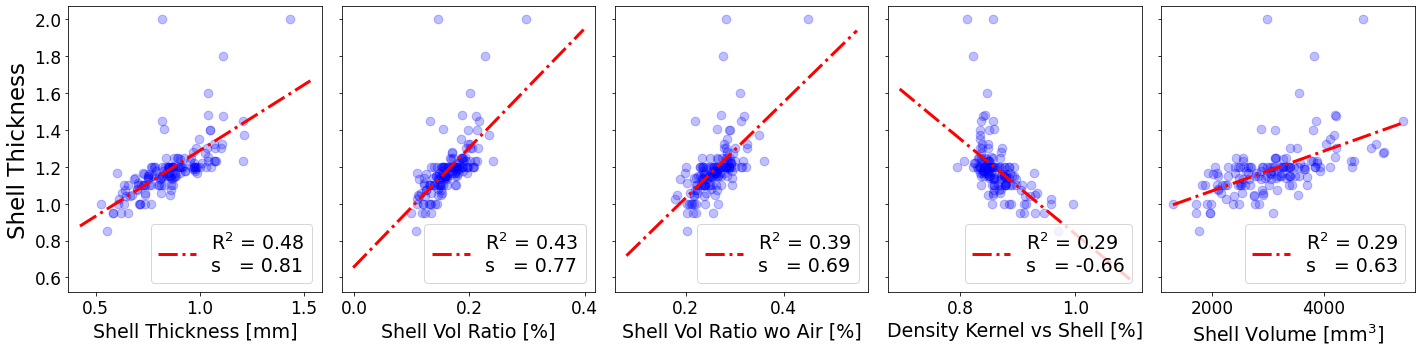

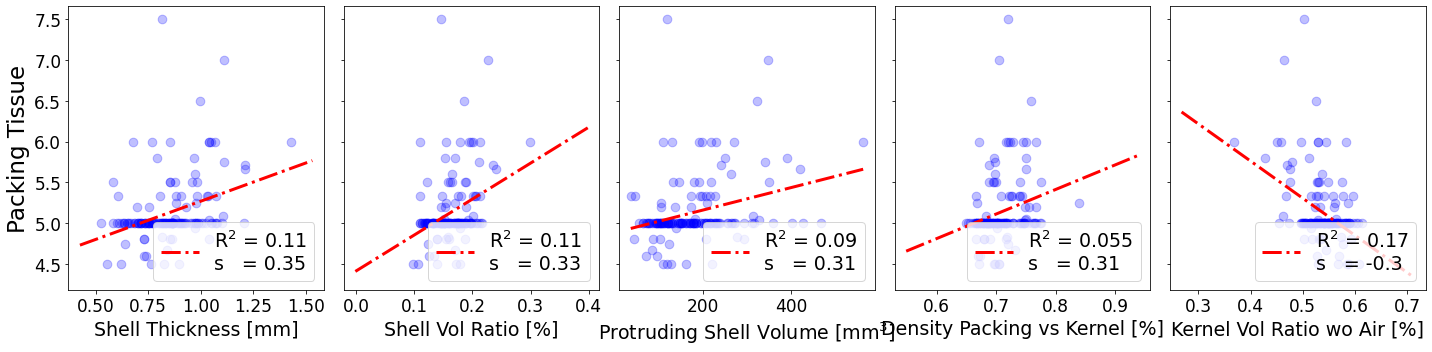

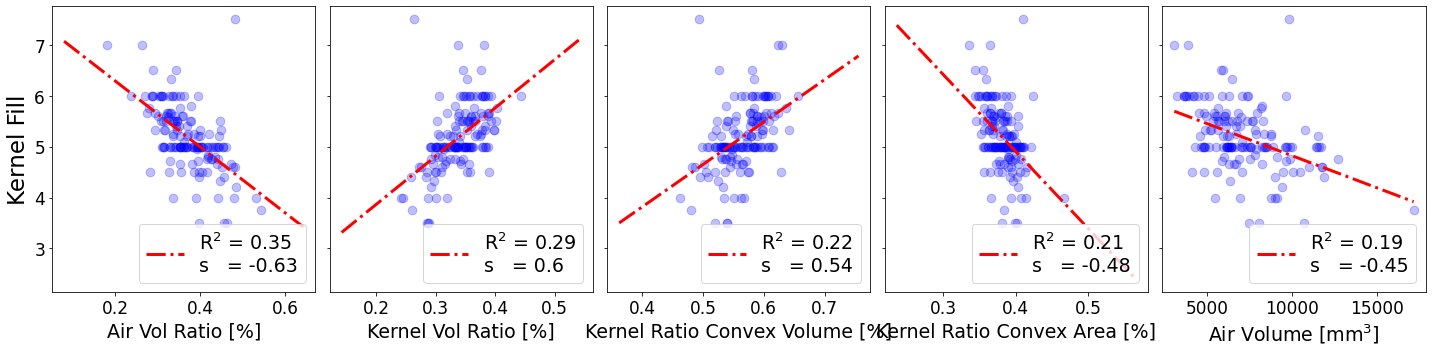

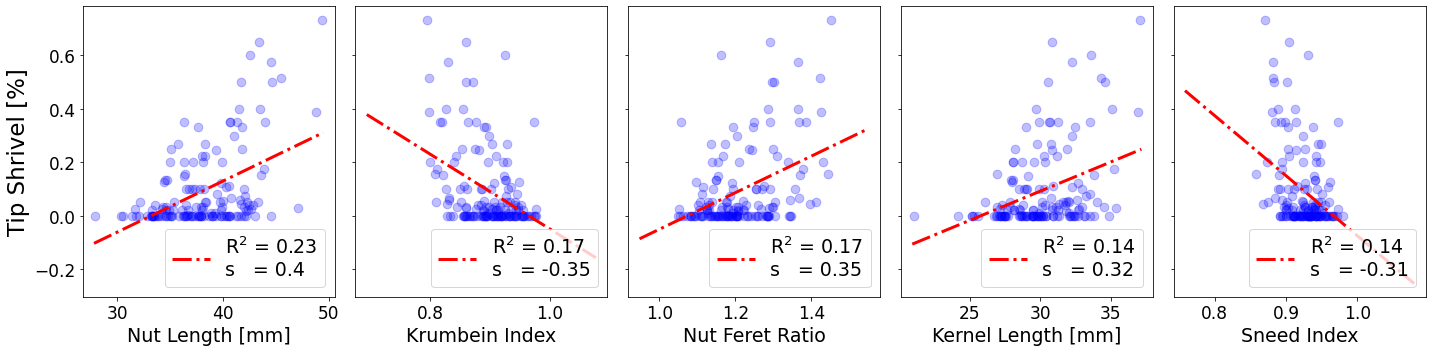

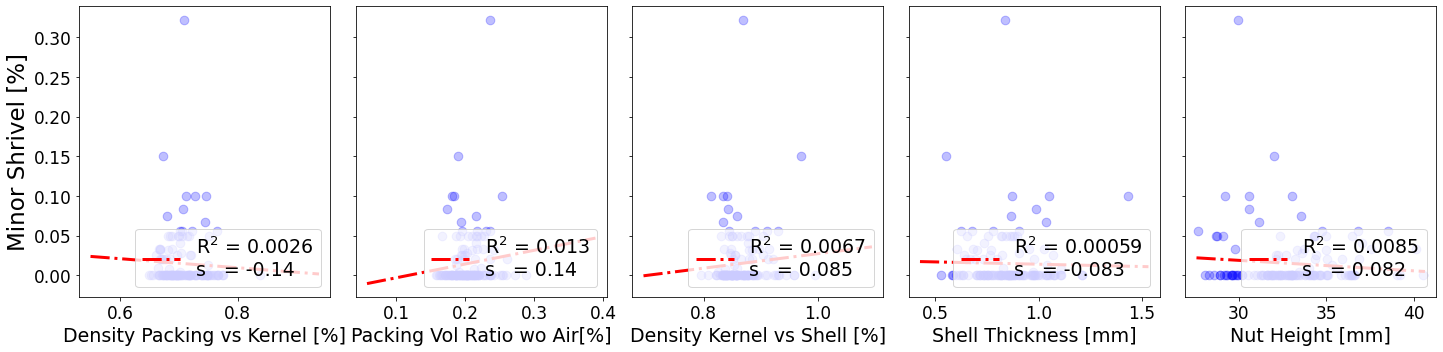

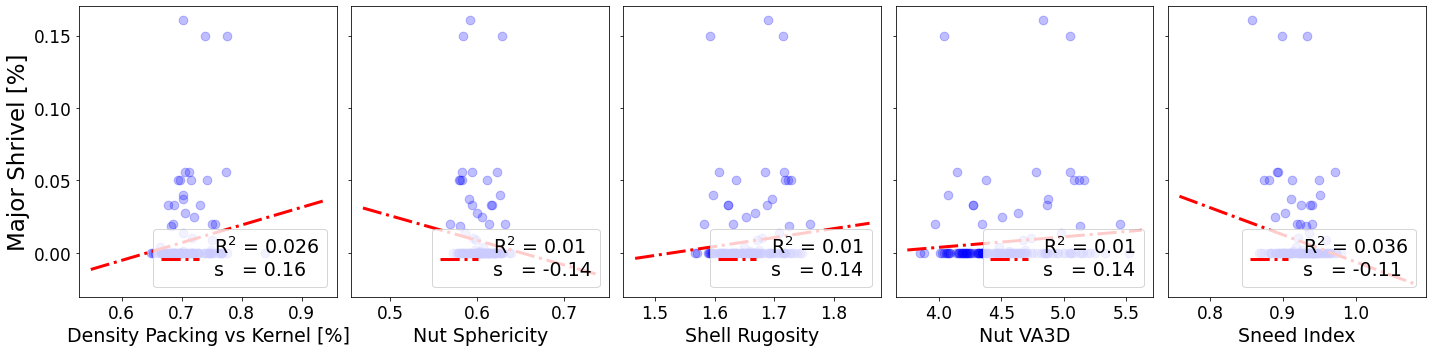

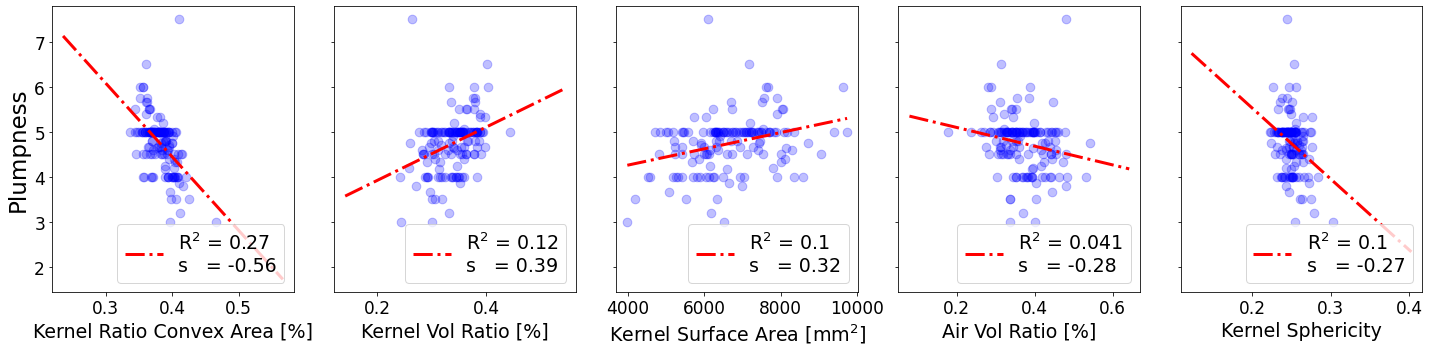

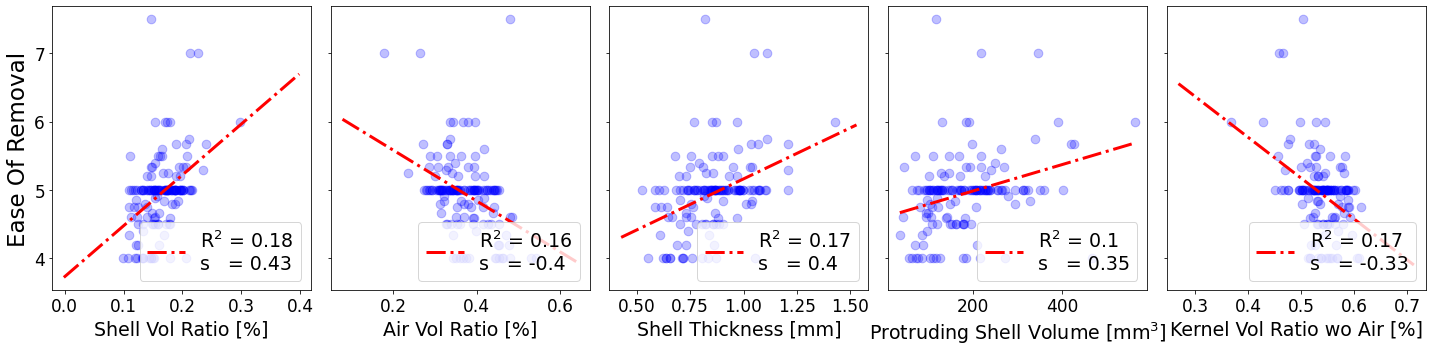

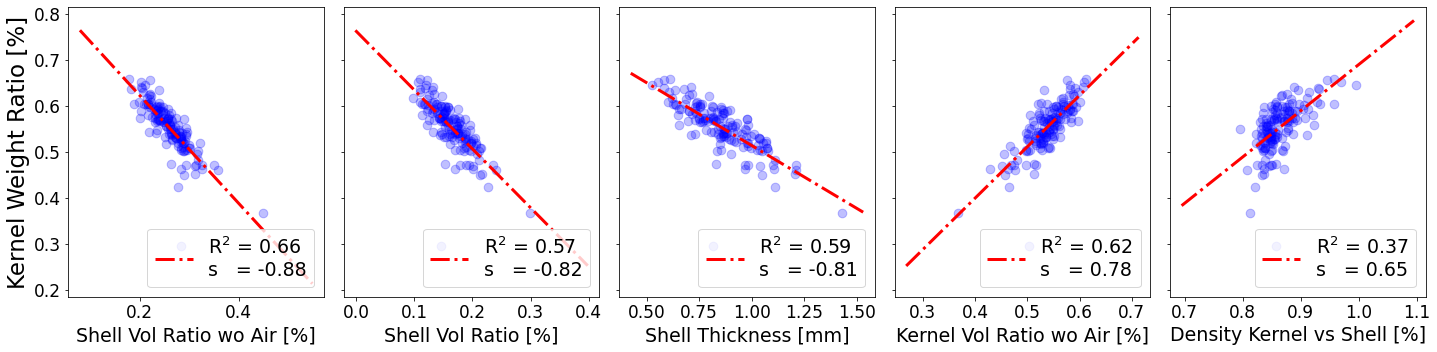

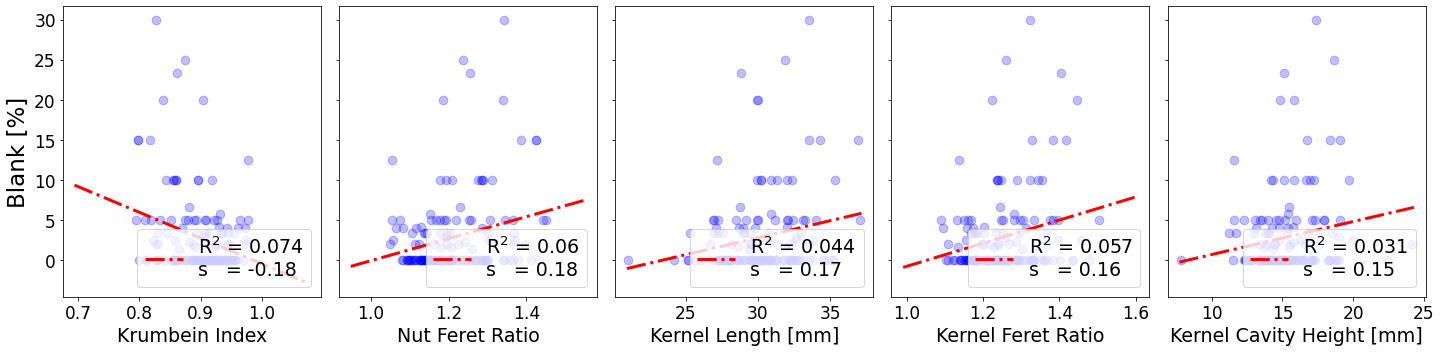

In [27]:
fs = 19
for yidx in ptraits:
    fig, ax = plt.subplots(1,5,figsize=(20,5), sharey=True)
    ax = np.atleast_1d(ax).ravel()
    y = df.iloc[:, yidx].values

    ax[0].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs+4);
    #ax[4].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs);

    for i,xidx in enumerate(np.argsort(np.abs(corr[:, yidx-len(qtraits)-offset]))[::-1][:len(ax)] + offset):
        x = df.iloc[:, xidx].values

        xrange = np.linspace(np.min(x)-0.1, np.max(x)+0.1, 100)

        s = corr[xidx - offset, yidx - len(qtraits) - offset]
        ax[i].scatter(x,y, c='b', alpha=0.25, s=75)
        ax[i].tick_params(labelsize=fs-2)

        ax[i].set_xlabel(labels.col_labels[xidx] + labels.col_units[xidx], fontsize=fs);

        new_series = P.Polynomial.fit(x,y, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(y, new_series(x))
        axlabel = 'R$^2$ = {:.2}\ns   = {:.2}'.format(r2,s)
        ax[i].plot(xrange, new_series(xrange), color='r', label=axlabel, ls='-.', lw=3)
        ax[i].legend(loc='lower right', fontsize=fs)

    fig.tight_layout()
    filename = dst + 'highest_corrs_' + labels.col_labels[yidx].replace(' ', '_').lower() + '_1x5'
    print(filename)
    
    plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients


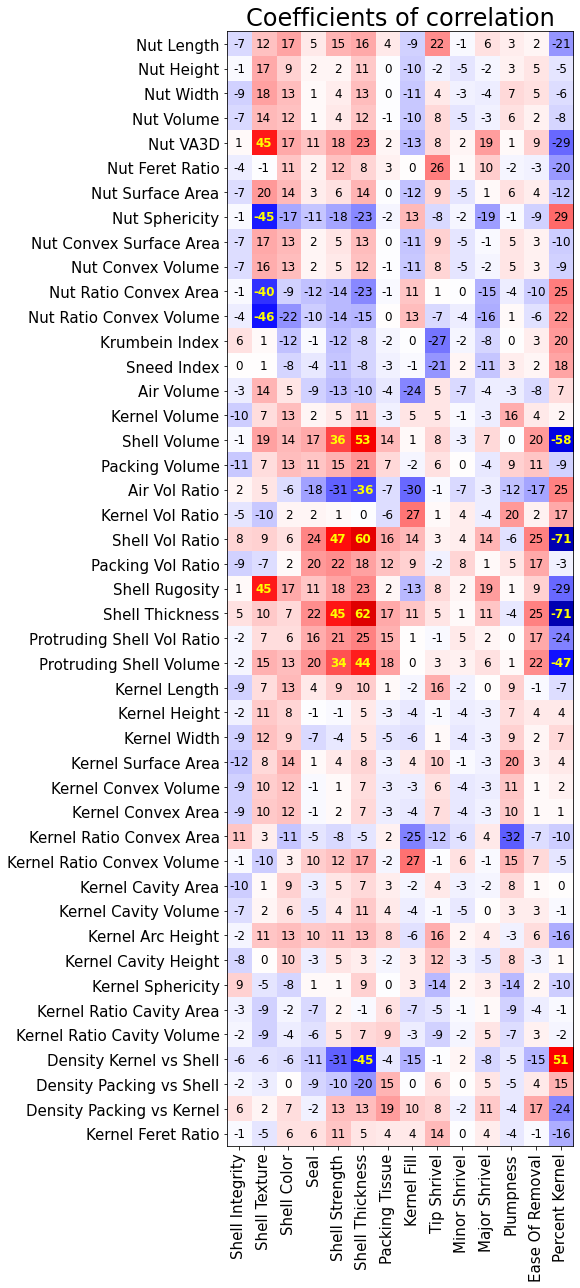

In [45]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(corr.shape[1]))
ax.set_yticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_xticklabels(labels.col_labels.iloc[ptraits])
ax.set_yticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients_h


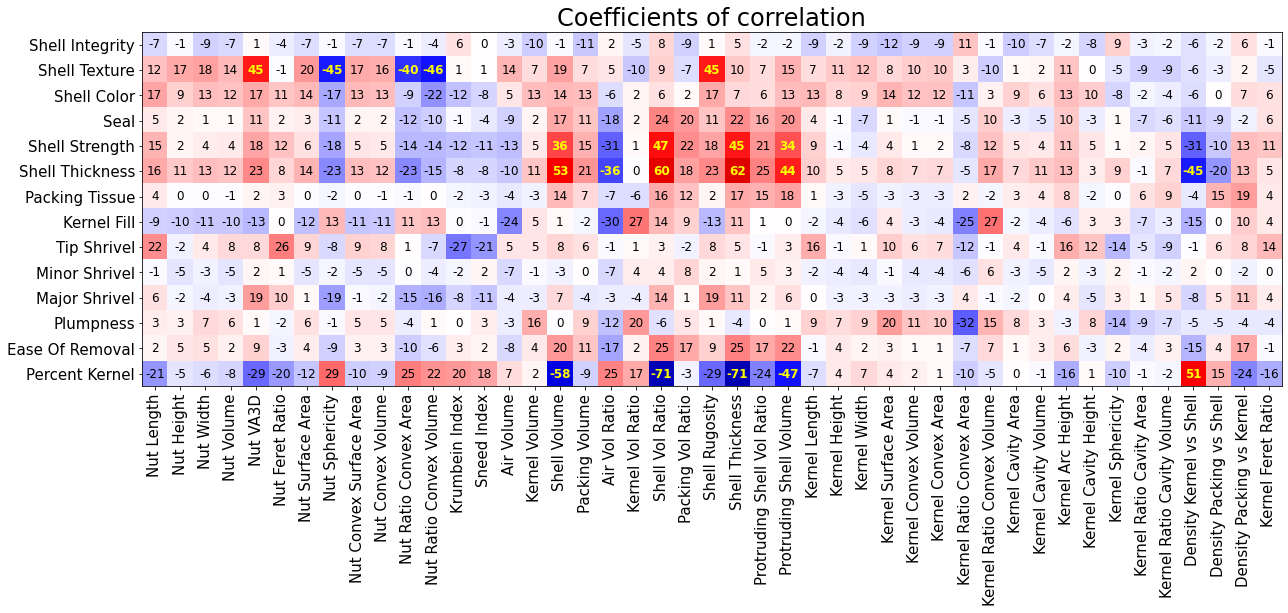

In [46]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr.T, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_yticks(np.arange(corr.shape[1]))
ax.set_xticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_yticklabels(labels.col_labels.iloc[ptraits])
ax.set_xticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(i,j, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients_h'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

In [47]:
offset = 3

qtraits = np.arange(offset,48)
ptraits = np.arange(48, len(df.columns) - 1)

kcorrstat = np.ones((len(qtraits), len(ptraits)))
kpvalcorr = np.zeros_like(kcorrstat)

scorrstat = np.ones_like(kcorrstat)
spvalcorr = np.zeros_like(kcorrstat)

feats = other.iloc[:, offset:62].values.copy()

for i in range(len(qtraits)):
    for j in range(len(ptraits)):
        kstat, kpval = stats.kendalltau(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        sstat, spval = stats.spearmanr(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        
        kcorrstat[i,j] = kstat
        kpvalcorr[i,j] = kpval
        
        scorrstat[i,j] = sstat
        spvalcorr[i,j] = spval

corr = np.zeros_like(scorrstat)
corr[:, pquant] = scorrstat[:, pquant]
corr[:, pqual]  = kcorrstat[:, pqual]

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients_minus_himalayan


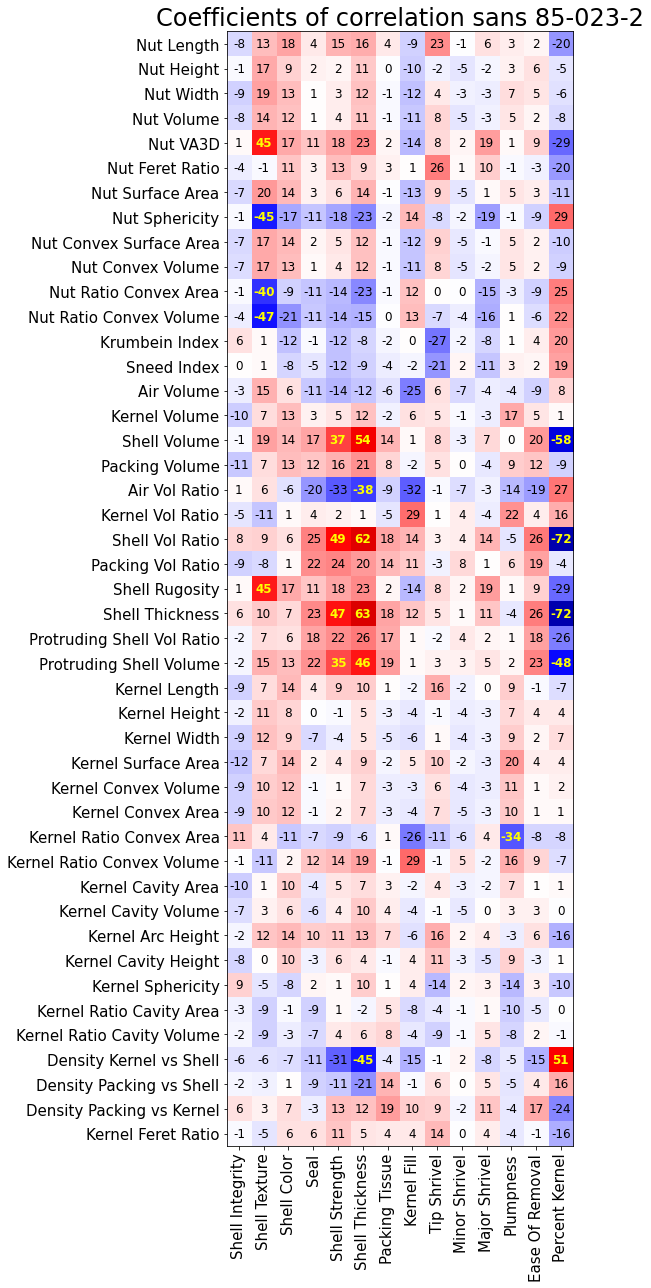

In [48]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(corr.shape[1]))
ax.set_yticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_xticklabels(labels.col_labels.iloc[ptraits])
ax.set_yticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation sans 85-023-2", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients_minus_himalayan'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients_h_minus_himalayan


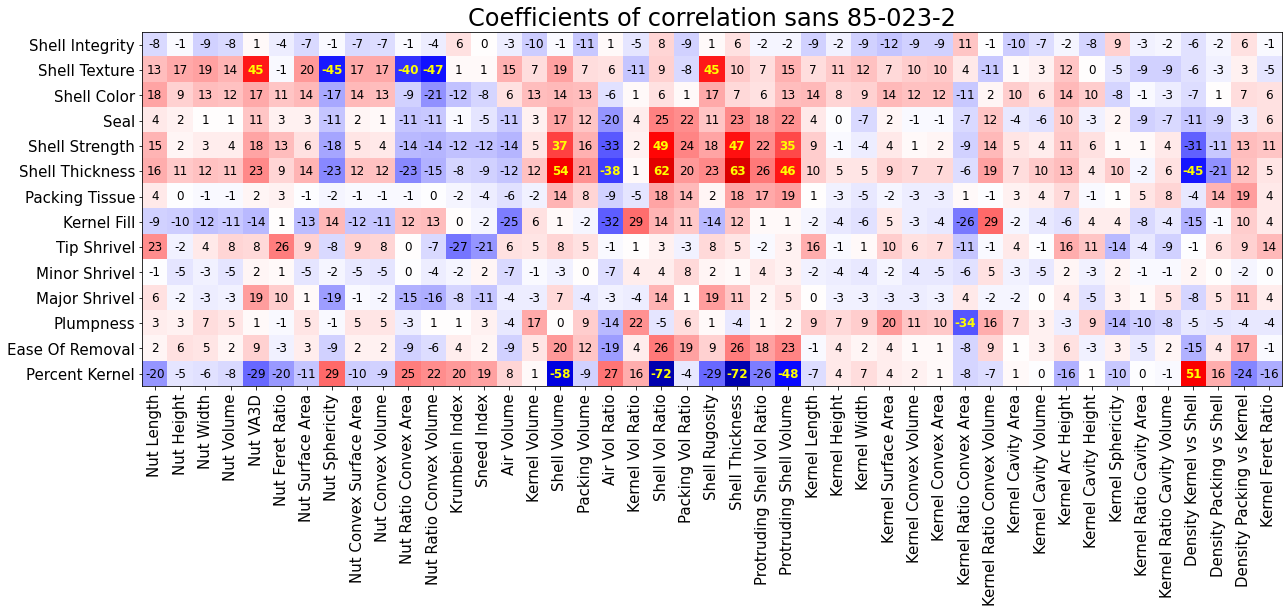

In [49]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr.T, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_yticks(np.arange(corr.shape[1]))
ax.set_xticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_yticklabels(labels.col_labels.iloc[ptraits])
ax.set_xticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(i,j, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation sans 85-023-2", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients_h_minus_himalayan'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

In [ ]:
interest

In [ ]:
foo = pd.DataFrame(scorrstat, columns=labels.col_labels.iloc[ptraits].values, index=labels.col_labels.iloc[qtraits].values)
foo

# Linear models

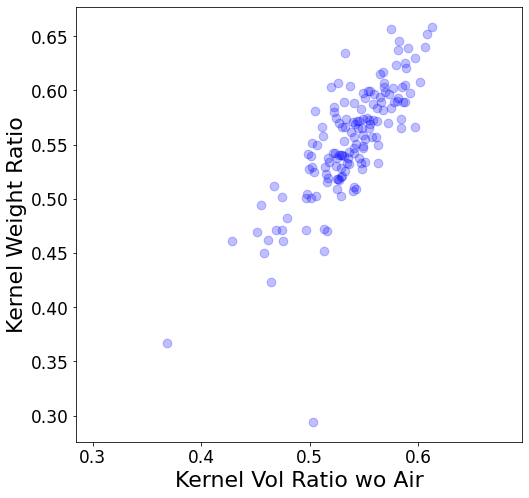

In [23]:
fs = 22

yidx = 65
xidx = 49

x = df.iloc[:, xidx].values
y = df.iloc[:, yidx].values

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.scatter(x,y, c='b', alpha=0.25, s=75)
ax.set_aspect('equal', 'datalim')
ax.tick_params(labelsize=fs-5)

ax.set_xlabel(labels.col_labels[xidx], fontsize=fs);
ax.set_ylabel(labels.col_labels[yidx], fontsize=fs);



# Regression

In [ ]:
fixtrait = 27
mask = list(range(2,fixtrait)) + list(range(fixtrait,51))
X = df.iloc[:,mask].values
print(X.shape)
y = df.iloc[:,fixtrait].values
print(y.shape)

In [ ]:
alphas = np.sort(np.hstack((10**np.linspace(-4,0,5), 5*10**np.linspace(-4,-1,4))))
clf = linear.RidgeCV(alphas=alphas).fit(X,y)
clf.score(X,y)

In [ ]:
clf.alpha_